# Exercise 05: Boxplot

Подключаемся к базе данных

In [31]:
import pandas as pd
import matplotlib.pyplot as plt



df = pd.read_csv("../data/ab-test.csv")

Работаем с датафреём и выделяем необходимые данные

In [32]:
df_before = df[df['time'] == 'before'].copy()
df_after = df[df['time'] == 'after'].copy()
df_before.count(), df_after.count()

(uid      22
 diff     22
 time     22
 group    22
 dtype: int64,
 uid      22
 diff     22
 time     22
 group    22
 dtype: int64)

Создаём график

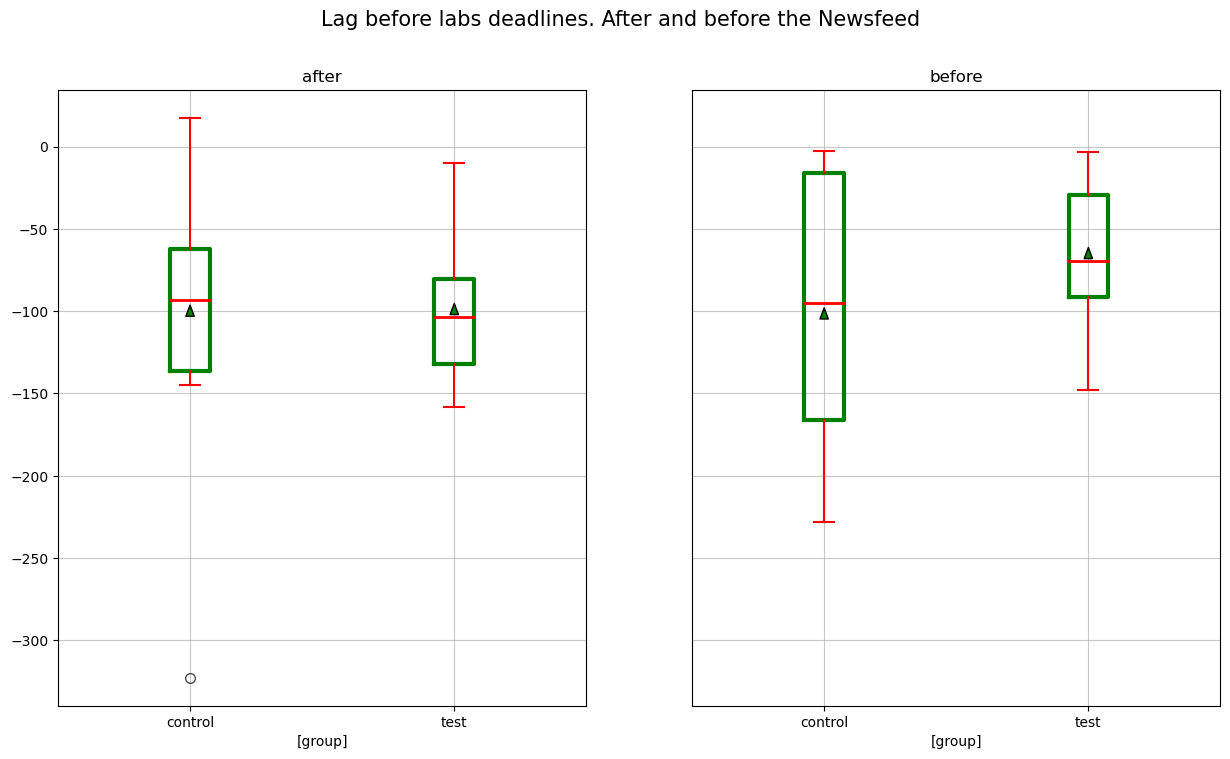

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

ax1 = axes[0]
data_after = [df_after[df_after['group'] == 'control']['diff'].dropna(),
              df_after[df_after['group'] == 'test']['diff'].dropna()]

box1 = ax1.boxplot(
    data_after,
    labels=['control', 'test'],
    boxprops=dict(color="green", linewidth=3),
    medianprops=dict(color="red", linewidth=2),
    whiskerprops=dict(color="red", linewidth=1.5),
    capprops=dict(color="red", linewidth=1.5),
    flierprops=dict(marker='o', markersize=7, alpha=0.7, markeredgecolor="black")
)

ax1.set_title('after', fontsize=12)
ax1.set_xlabel('[group]')
ax1.grid(axis='y', linestyle='-', alpha=0.7)
ax1.grid(axis='x', linestyle='-', alpha=0.7)

ax2 = axes[1]
data_before = [df_before[df_before['group'] == 'control']['diff'].dropna(),
               df_before[df_before['group'] == 'test']['diff'].dropna()]

box2 = ax2.boxplot(
    data_before,
    labels=['control', 'test'],
    boxprops=dict(color="green", linewidth=3),
    medianprops=dict(color="red", linewidth=2),
    whiskerprops=dict(color="red", linewidth=1.5),
    capprops=dict(color="red", linewidth=1.5),
    flierprops=dict(marker='o', markersize=4, alpha=0.7, markeredgecolor="black")
)

ax2.set_title('before', fontsize=12)
ax2.set_xlabel('[group]')
ax2.grid(axis='y', linestyle='-', alpha=0.7)
ax2.grid(axis='x', linestyle='-', alpha=0.7)
y_min = min(ax1.get_ylim()[0], ax2.get_ylim()[0])
y_max = max(ax1.get_ylim()[1], ax2.get_ylim()[1])
ax1.set_ylim(y_min, y_max)
ax2.set_ylim(y_min, y_max)


ax2.tick_params(axis='y', which='both', left=False, right=False, labelleft=False) 

for ax, data_group in zip([ax1, ax2], [df_after, df_before]):
    for i, group in enumerate(['control', 'test'], start=1):
        median_val = data_group[data_group['group'] == group]['diff'].median()
        ax.annotate(
            '',
            xy=(i, median_val - 3 if group == "control" else median_val + 8), 
            xytext=(i, median_val - 8 if group == "control" else median_val + 4), 
            arrowprops=dict(
                facecolor='green',
                width=1,
                headwidth=6,
                headlength=8
            ),
            zorder=5
        )


fig.suptitle('Lag before labs deadlines. After and before the Newsfeed', fontsize=15)

# control_before = df[(df['group'] == 'control') & (df['time'] == 'before')]['diff']
# q1 = control_before.quantile(0.25)
# q3 = control_before.quantile(0.75)
# plt.axhline(q1, color='red', linestyle='--')
# plt.axhline(q3, color='red', linestyle='--' )

plt.show()

Каков был межквартильный размах в контрольной группе до появления новостной ленты?

Ответ: `150`